#Data Preprocessing

---

 Luthfia Amanah/ SC61522


Features:

age: age in years

sex: (1 = male; 0 = female)

cp: chest pain type (4 values)

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

restecg: resting electrocardiographic results (values 0,1,2)

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (0,1,2)

ca: number of major vessels (0-3) colored by flourosopy

thal: 1 = normal, 2 = fixed defect, 3 = reversable defect

target: 0 = no disease, 1 = disease

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(1025, 14)

## 1. ***Data Preparation***

---

### **Missing value**: Mencari missing value dan mengatasi masalah missing value jika ada.

In [ ]:
# Mencari missing value
missing = df.isnull().sum()
missing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# total missing value
total_hilang= missing.sum()
total_hilang

0

Tidak ditemukan missing value pada dataset.

### **Duplicate value**: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.

In [ ]:
# mencari duplicate value
duplicate = df[df.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# total duplicate value
total_duplikat = df.duplicated().sum()
total_duplikat

723

Ditemukan 723 baris duplikat dalam dataset. Selanjutnya akan dihapus entri duplikat.

In [ ]:
# menghapus entri duplicate
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Sudah tidak ditemukan entri duplikat dalam dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Setelah penghapusan duplikat, dataset memiliki 302 baris dengan 14 kolom. Dengan tipe data float 1 dan integer 13.

### **Outlier**: Memeriksa outlier dan menangani outlier jika ada.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


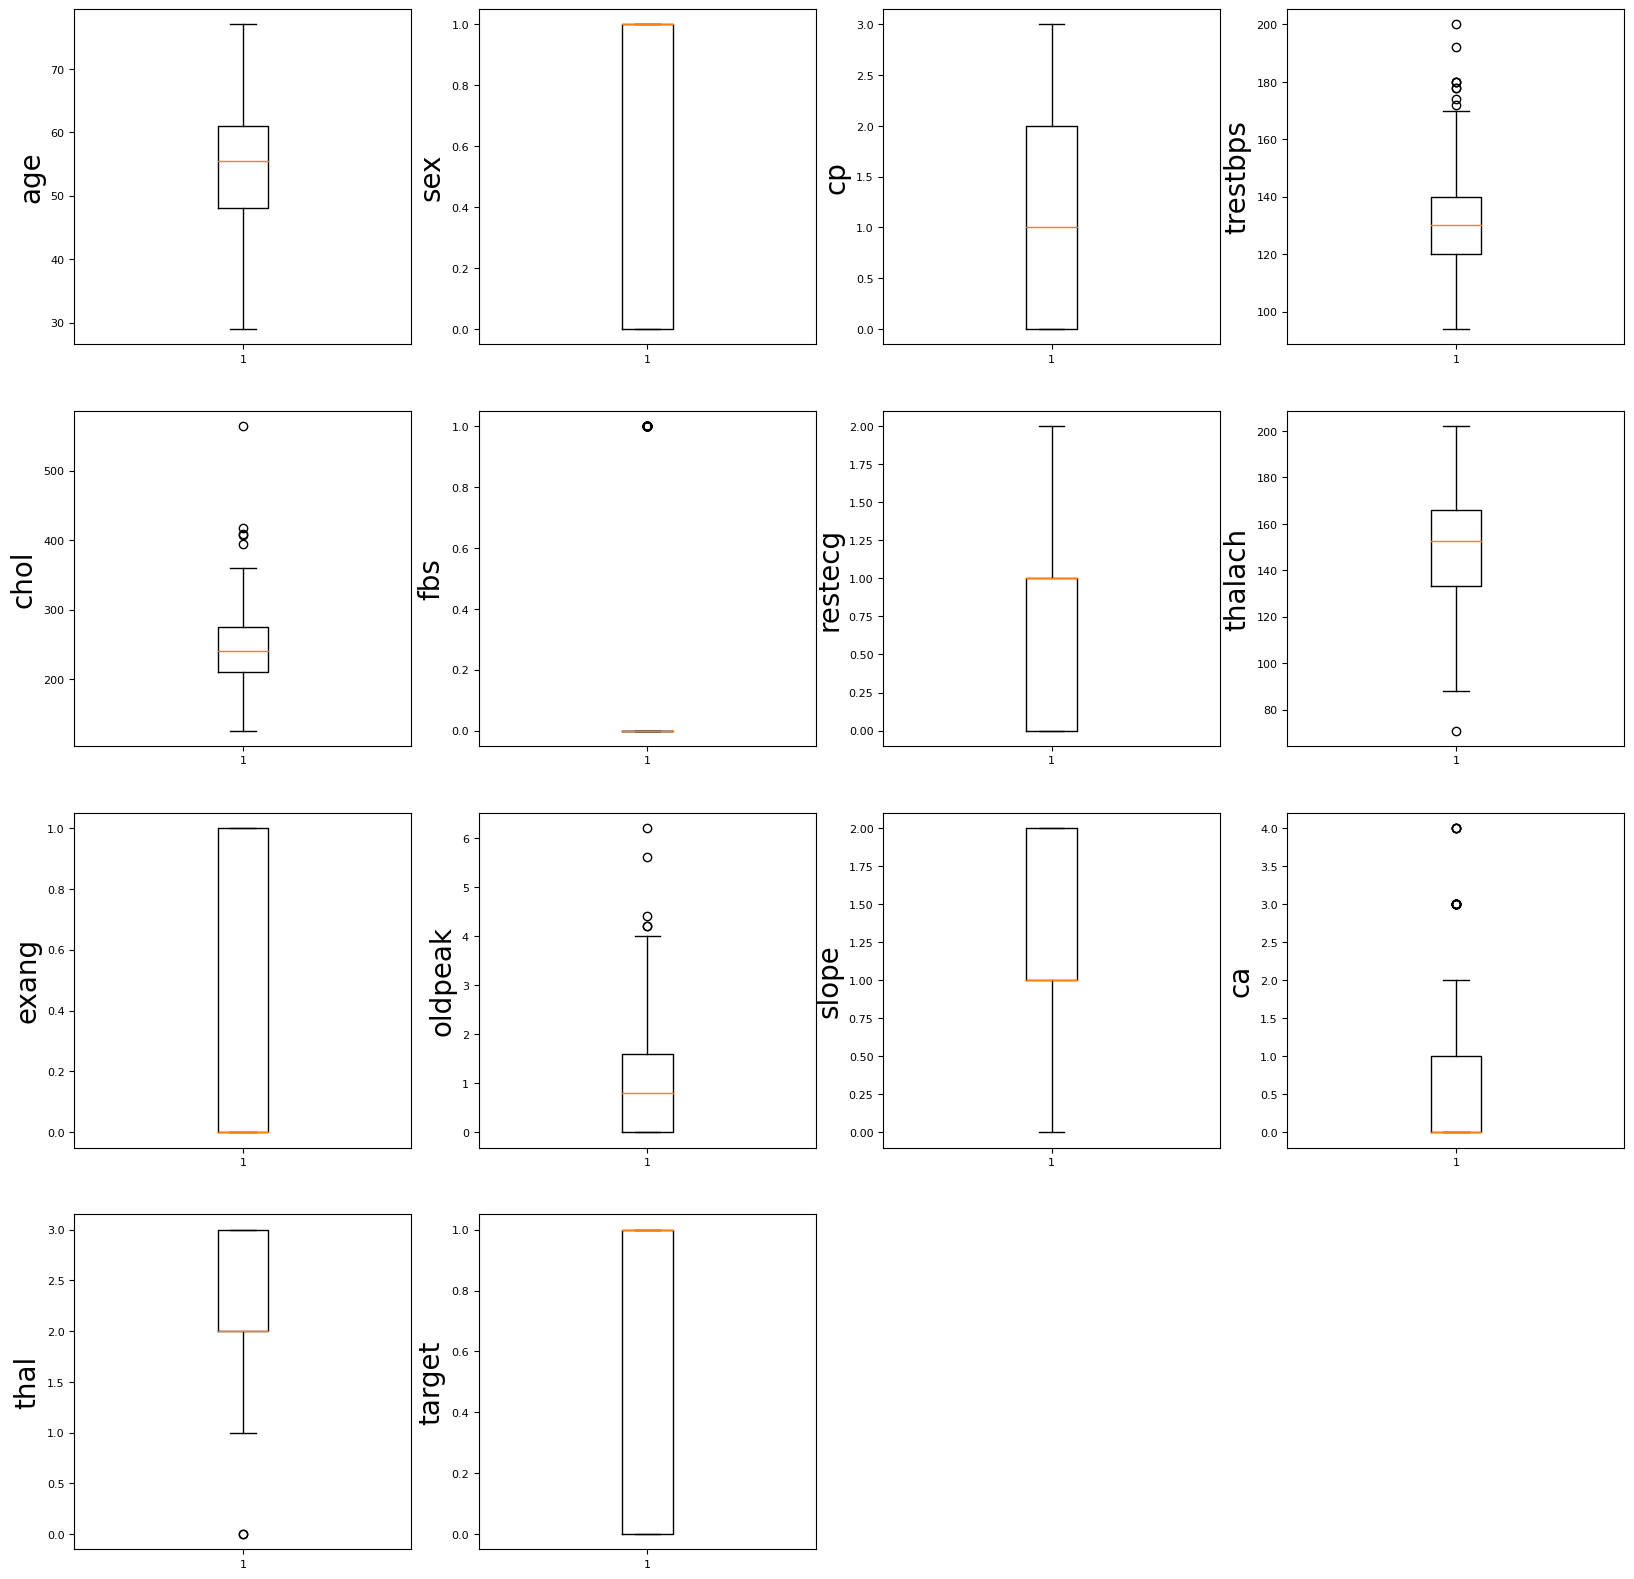

In [ ]:
# mengecek outliers setiap atribut menggunakan boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in df.columns:
    if plotnumber<15 :
        plt.subplot(4,4,plotnumber)
        plt.boxplot(df[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Dari boxplot diatas untuk beberapa variabel numerik, terdapat beberapa variabel yang memiliki outliers. Yaitu variabel trestbps, chol, thalach, dan oldpeak.

In [ ]:
# Fungsi untuk menghilangkan outlierss pake metode IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [ ]:
# Menghapus outliers
df = remove_outliers(df, 'trestbps')
df = remove_outliers(df, 'chol')
df = remove_outliers(df, 'thalach')
df = remove_outliers(df, 'oldpeak')

In [ ]:
# Kembali memeriksa outlier
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,129.883392,242.314488,0.141343,0.522968,149.961131,0.318021,0.951943,1.427562,0.696113,2.296820,0.558304
std,9.128186,0.459224,1.031324,15.387795,44.654188,0.348992,0.514336,22.691625,0.466533,1.026400,0.599246,0.985472,0.610392,0.497469
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


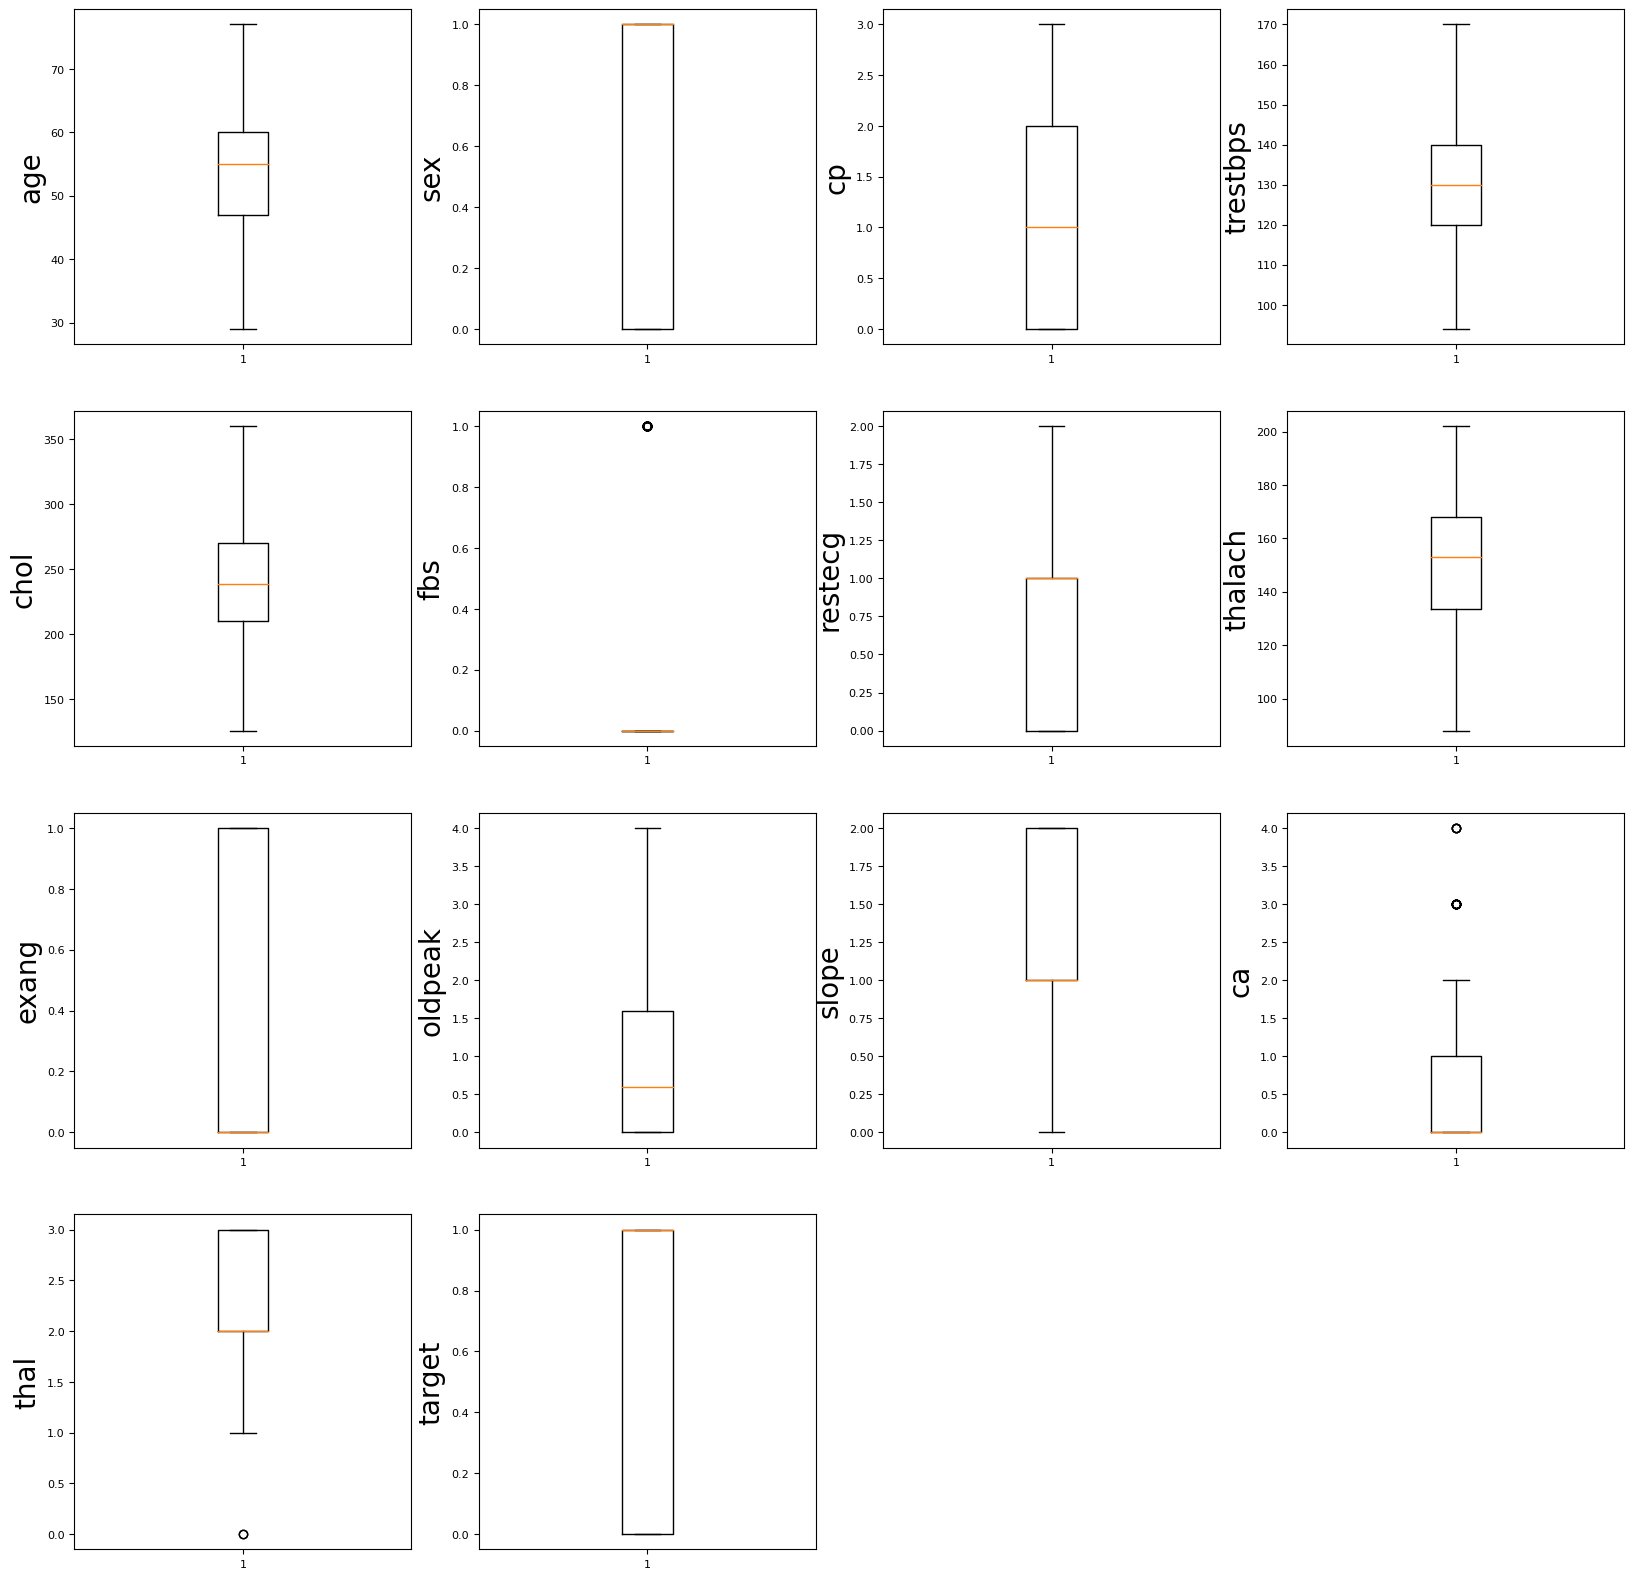

In [ ]:
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in df.columns:
    if plotnumber<15 :
        plt.subplot(4,4,plotnumber)
        plt.boxplot(df[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  target    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Sudah tidak ditemukan outliers.

### **Imbalance data**: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.

<Axes: xlabel='target', ylabel='count'>

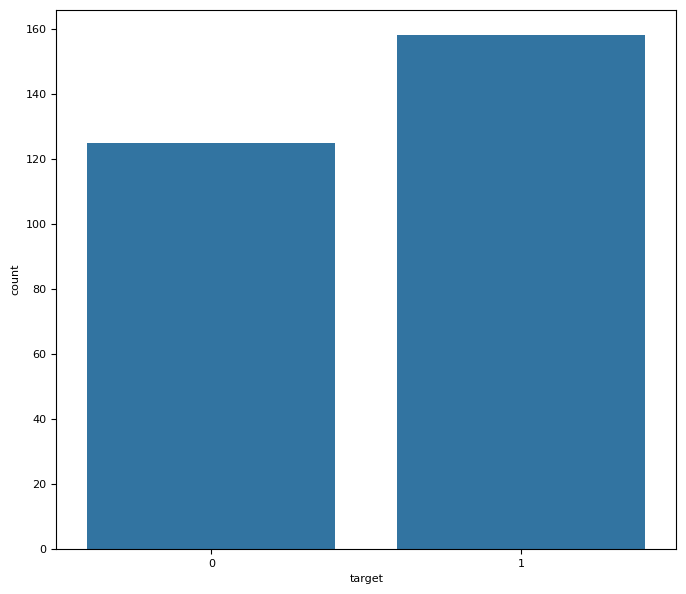

In [ ]:
# Memeriksai data imbalance
sns.countplot(x = df['target'])

In [ ]:
df['target'].value_counts()

1    158
0    125
Name: target, dtype: int64

Dapat dilihat pada output diatas data cukup seimbang (balanced) karena tidak terdapat perbedaan yang signifikan.

### **Feature encoding**: Melakukan feature encoding jika diperlukan.

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Feature encoding bertujuan untuk mengubah nilai non-numerik menjadi nilai numerik. Pada dataset ditemukan 1 tipe data float dan 13 tipe data integer yang termasuk dalam kategori tipe data numerik. Sehingga tidak diperlukan feature encoding karena setiap variabel sudah bertipe data numerik.

## 2. ***Exploratory Data Analysis (EDA)***

---



### Tipe Data


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df['age']

0      52
1      53
2      70
3      61
4      62
       ..
723    68
733    44
739    52
843    59
878    54
Name: age, Length: 283, dtype: int64

Fitur age merupakan data numerical

In [ ]:
df['sex']

0      1
1      1
2      1
3      1
4      0
      ..
723    0
733    0
739    1
843    1
878    1
Name: sex, Length: 283, dtype: int64

Fitur sex merupakan data nominal

In [ ]:
df['cp']

0      0
1      0
2      0
3      0
4      0
      ..
723    2
733    2
739    0
843    3
878    0
Name: cp, Length: 283, dtype: int64

Fitur cp (chest pain) merupakan data ordinal

In [ ]:
df['trestbps']

0      125
1      140
2      145
3      148
4      138
      ... 
723    120
733    108
739    128
843    160
878    120
Name: trestbps, Length: 283, dtype: int64

Fitur trestbps (resting blood pressure) merupakan data numerical

In [ ]:
df['chol']

0      212
1      203
2      174
3      203
4      294
      ... 
723    211
733    141
739    255
843    273
878    188
Name: chol, Length: 283, dtype: int64

Fitur chol (serum cholestrol) merupakan data numerical

In [ ]:
df['fbs']

0      0
1      1
2      0
3      0
4      1
      ..
723    0
733    0
739    0
843    0
878    0
Name: fbs, Length: 283, dtype: int64

Fitur fbs (fasting blood sugar) merupakan data nominal

In [ ]:
df['restecg']

0      1
1      0
2      1
3      1
4      1
      ..
723    0
733    1
739    1
843    0
878    1
Name: restecg, Length: 283, dtype: int64

Fitur restecg (resting electrocardiographic results) merupakan data ordinal

In [ ]:
df['thalach']

0      168
1      155
2      125
3      161
4      106
      ... 
723    115
733    175
739    161
843    125
878    113
Name: thalach, Length: 283, dtype: int64

Fitur thalach (maximum heart rate achieved) merupakan data numerical

In [ ]:
df['exang']

0      0
1      1
2      1
3      0
4      0
      ..
723    0
733    0
739    1
843    0
878    0
Name: exang, Length: 283, dtype: int64

Fitur exang(exercise induced angina) merupakan data nominal

In [ ]:
df['oldpeak']

0      1.0
1      3.1
2      2.6
3      0.0
4      1.9
      ... 
723    1.5
733    0.6
739    0.0
843    0.0
878    1.4
Name: oldpeak, Length: 283, dtype: float64

Fitur oldpeak(ST depression induced by exercise) merupakan data numerical

In [ ]:
df['slope']

0      2
1      0
2      0
3      2
4      1
      ..
723    1
733    1
739    2
843    2
878    1
Name: slope, Length: 283, dtype: int64

Fitur slope(slope of the peak exercise ST segment) merupakan data ordinal

In [ ]:
df['ca']

0      2
1      0
2      0
3      1
4      3
      ..
723    0
733    0
739    1
843    0
878    1
Name: ca, Length: 283, dtype: int64

Fitur ca(number of major vessels colored by fluoroscopy) merupakan data nominal

In [ ]:
df['thal']

0      3
1      3
2      3
3      3
4      2
      ..
723    2
733    2
739    3
843    2
878    3
Name: thal, Length: 283, dtype: int64

Fitur thal(findings from the Thallium-201 imaging) merupakan data ordinal

In [ ]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 283, dtype: int64

Fitur target(diagnosis of heart disease) merupakan data ordinal

### Statistical Five Summaries

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
sex,283.0,0.699647,0.459224,0.0,0.0,1.0,1.0,1.0
cp,283.0,0.985866,1.031324,0.0,0.0,1.0,2.0,3.0
trestbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
fbs,283.0,0.141343,0.348992,0.0,0.0,0.0,0.0,1.0
restecg,283.0,0.522968,0.514336,0.0,0.0,1.0,1.0,2.0
thalach,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
exang,283.0,0.318021,0.466533,0.0,0.0,0.0,1.0,1.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


In [ ]:
# melihat hanya five-number summaries
summary = df.describe()
print(summary.loc[['min', '25%', '50%', '75%', 'max']])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
min  29.0  0.0  0.0      94.0  126.0  0.0      0.0     88.0    0.0      0.0   
25%  47.0  0.0  0.0     120.0  210.5  0.0      0.0    133.5    0.0      0.0   
50%  55.0  1.0  1.0     130.0  239.0  0.0      1.0    153.0    0.0      0.6   
75%  60.0  1.0  2.0     140.0  270.5  0.0      1.0    168.0    1.0      1.6   
max  77.0  1.0  3.0     170.0  360.0  1.0      2.0    202.0    1.0      4.0   

     slope   ca  thal  target  
min    0.0  0.0   0.0     0.0  
25%    1.0  0.0   2.0     0.0  
50%    1.0  0.0   2.0     1.0  
75%    2.0  1.0   3.0     1.0  
max    2.0  4.0   3.0     1.0  


In [ ]:
# memanggil per kolom
df['age'].describe()

count    283.000000
mean      54.049470
std        9.128186
min       29.000000
25%       47.000000
50%       55.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

### Univariate Analysis

Distribusi usia pasien penyakit jantung

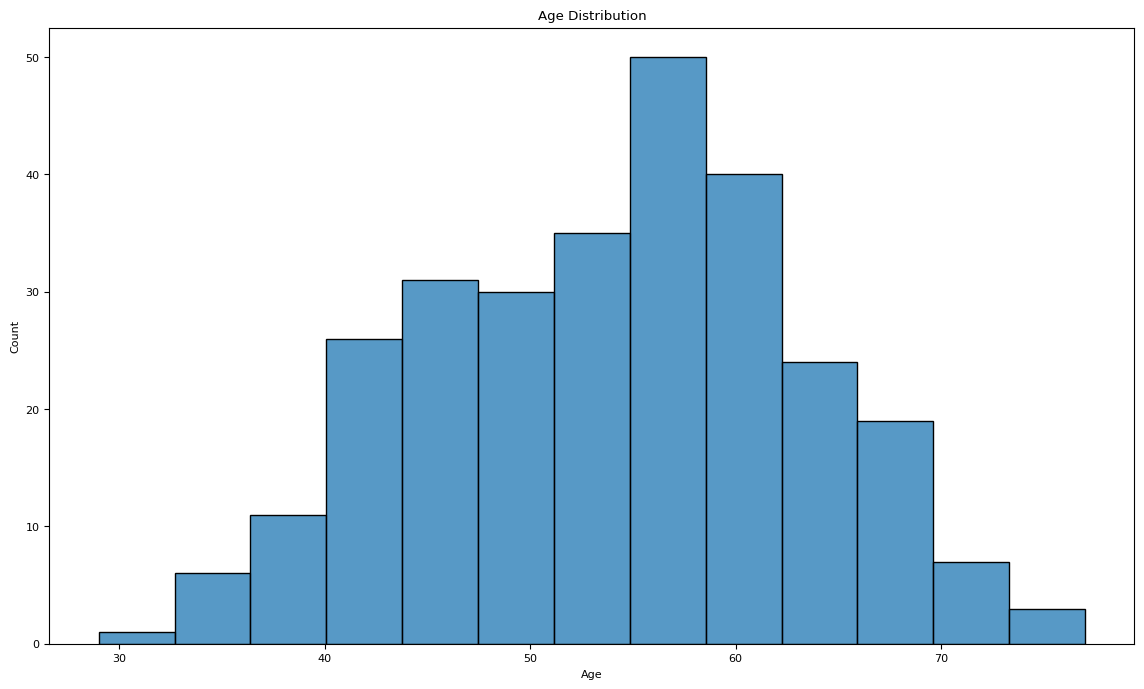

In [ ]:
# histogram plot untuk fitur age
plt.figure(figsize=(14,8))
sns.histplot(df.age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

Dapat dilihat pada histogram bahwa usia terbanyak pasien penyakit jantung di kisaran 58 tahun.

Distribusi jenis kelamin pasien penyakit jantung

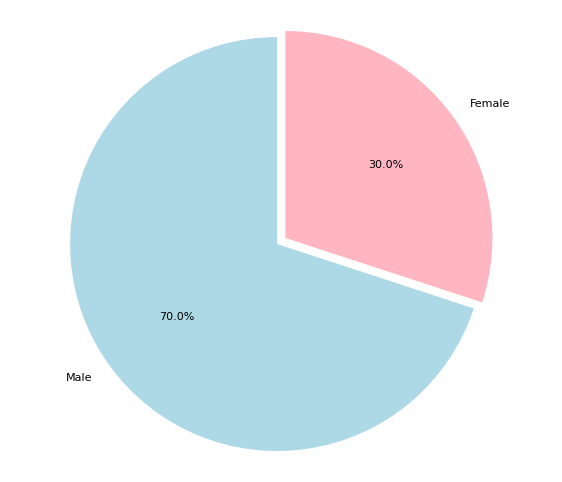

In [ ]:
# pie chart untuk fitur sex
male = len(df[df['sex'] == 1])
female = len(df[df['sex'] == 0])
labels = 'Male','Female'
sizes = [male, female]
colors = ['lightblue', 'lightpink']
explode = (0, 0.05)
plt.figure(figsize=(7,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

Dapat diilihat pada pie chart bahwa pasien penyakit jantung sebagian besar adalah laki-laki.

Tipe dari nyeri dada (chest pain)

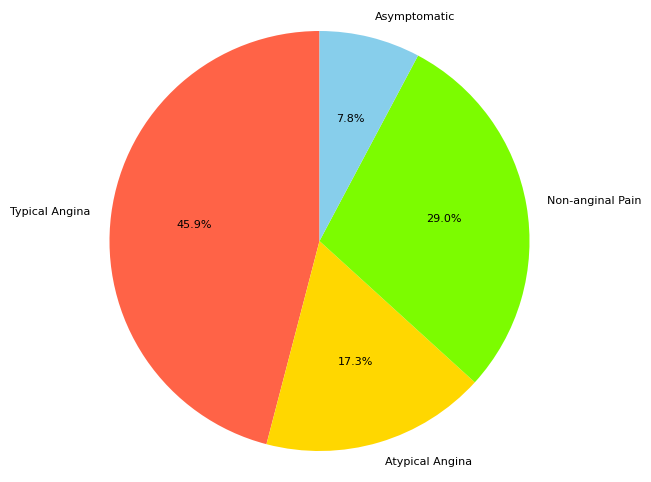

In [ ]:
# pie chart untuk fitur cp
cp1 = len(df[df['cp'] == 0])
cp2 = len(df[df['cp'] == 1])
cp3 = len(df[df['cp'] == 2])
cp4 = len(df[df['cp'] == 3])
labels = 'Typical Angina','Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'
sizes = [cp1, cp2, cp3, cp4 ]
explode = (0, 0, 0, 0)
colors = ['#FF6347','#FFD700','#7CFC00','#87CEEB']
plt.figure(figsize=(7,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

Dapat dilihat pada pie chat bahwa persentase tertinggi pasien mengalami angina tipikal dan persentase terendah pasien mengalami nyeri dada tanpa gejala.

### Bivariate Analysis

Mengecek korelasi antar fitur

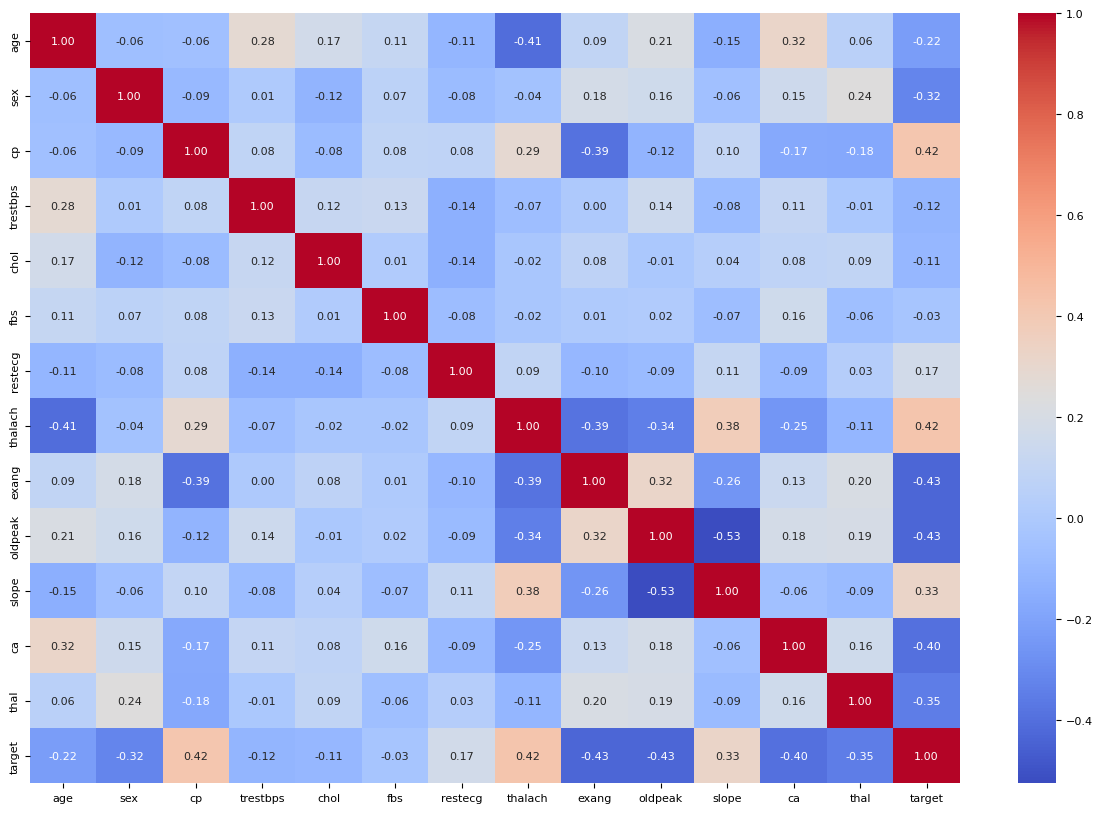

In [ ]:
# membuat correlation plot
corr = df.corr()

# membuat heatmap dengan seaborn
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

# mengatur ukuran font annotasi
plt.rcParams['font.size'] = 8

plt.show()

Dapat dilihat pada correlation matrix bahwa korelasi tertinggi yaitu antara usia dengan target.

Hubungan antara usia dengan target

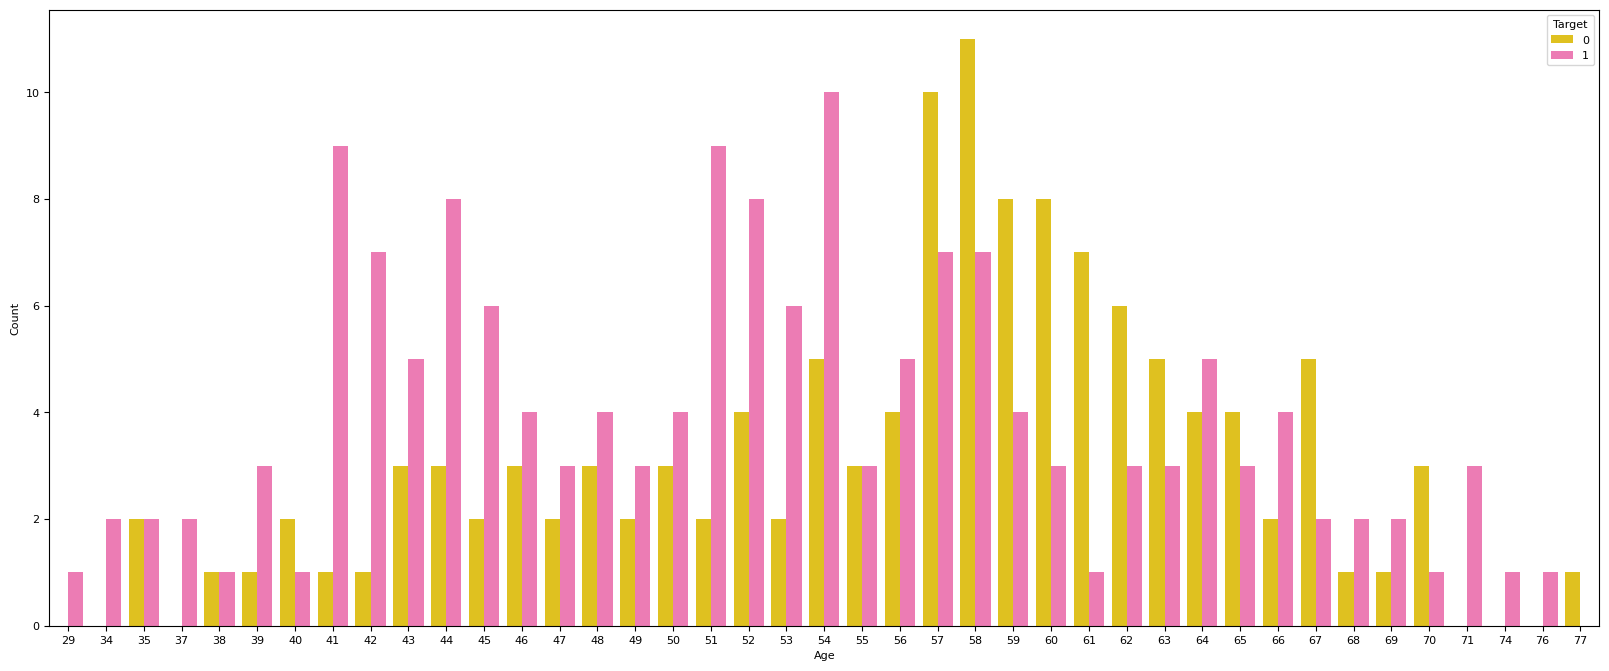

In [ ]:
# Histogram plot hubungan fitur age dengan fitur target
plt.figure(figsize=(20,8)) # Size of the figure
sns.countplot(data=df, x='age', hue = 'target', palette=['#FFD700', '#FF69B4'])
plt.legend(loc='upper right', title="Target") # Location and title of legend
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Dapat dilihat pada histogram bahwa usia pasien penyakit jantung berada pada usia 58 tahun.

Hubungan antara usia dengan tekanan darah istirahat

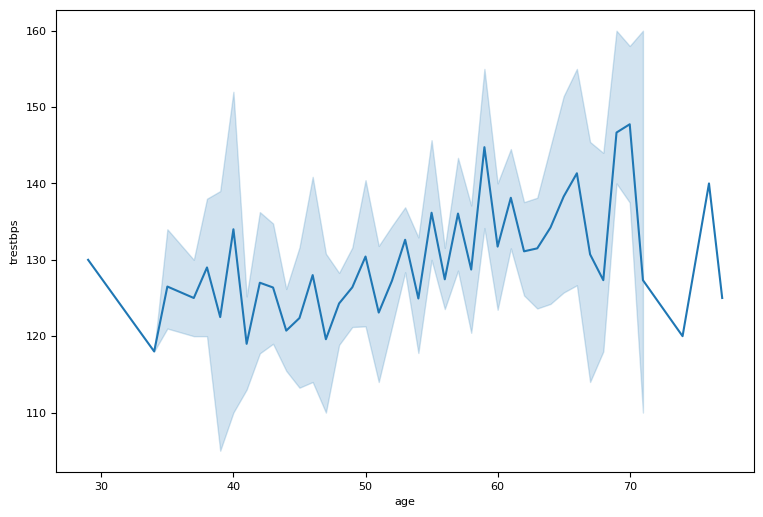

In [ ]:
#line plot hubungan fitur age dengan trestbps
plt.figure(figsize=(9,6))
sns.lineplot(data=df,x='age', y='trestbps')
plt.show()

Dapat dilihat pada line plot bahwa semakin bertambahnya usia, tekanan darah juga akan meningkat.

Hubungan jenis kelamin dengan target

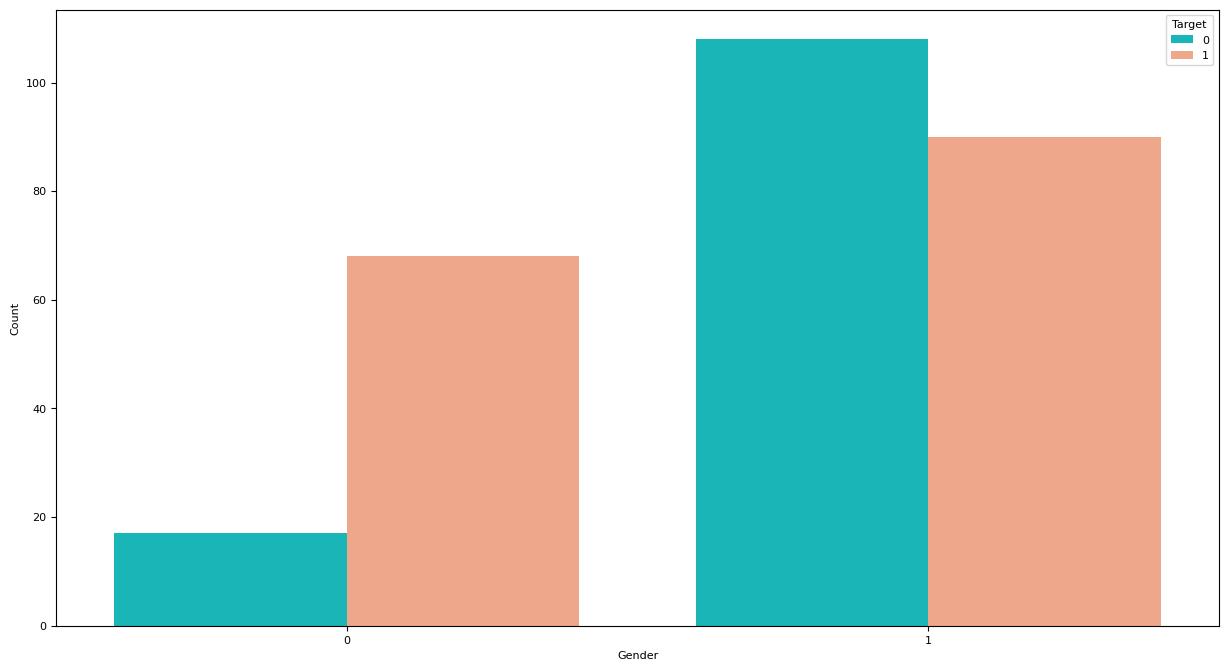

In [ ]:
# histogram plot hubungan fitur sex dengan fitur target
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='sex', hue = 'target', palette=['#00CED1', '#FFA07A'])
plt.legend(loc='upper right', title="Target")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Dapat dilihat pada histogram bahwa laki-laki mempunyai resiko lebih tinggi terkena penyakit jantung.

Hubungan tekanan darah istirahat dengan target

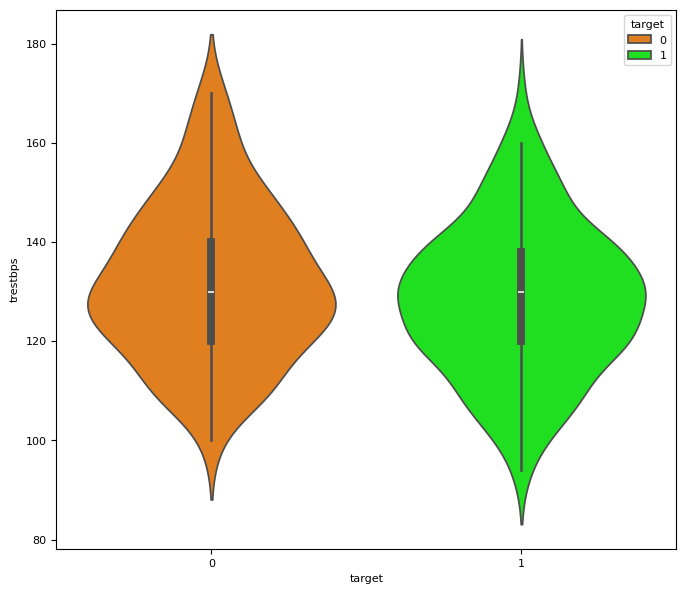

In [ ]:
# violin plot hubungan fitur trestbps dengan fitur target
plt.rcParams['figure.figsize'] = (8, 7)
sns.violinplot(data=df, x='target', y='trestbps',hue='target', palette=['#FF7F00', '#00FF00'])
plt.show()

Pada violin plot tidak dapat diambil kesimpulan bahwa tekanan darah tinggi dapat menyebabkan penyakit jantung.

### Multivariate Analysis

Hubungan antara kadar kolesterol dalam mg/dl, tekanan darah maksimal yang dapat dicapai, dan target

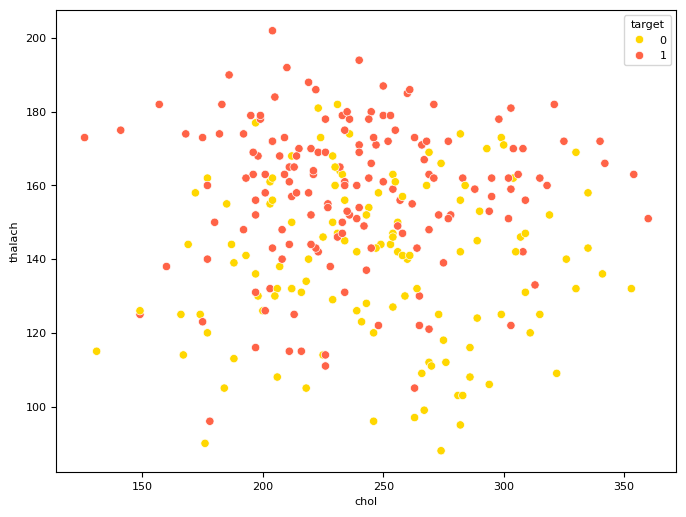

In [ ]:
# scatterplot hubungan fitur chol, thalach, dan target
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target', palette=['#FFD700', '#FF6347'])
plt.show()

### Distribusi data, mean, median, modus

<ipython-input-532-a76b021e0590>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-532-a76b021e0590>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-532-a76b021e0590>:8: UserWarning: 

`distplot` is a deprecated function and will be removed i

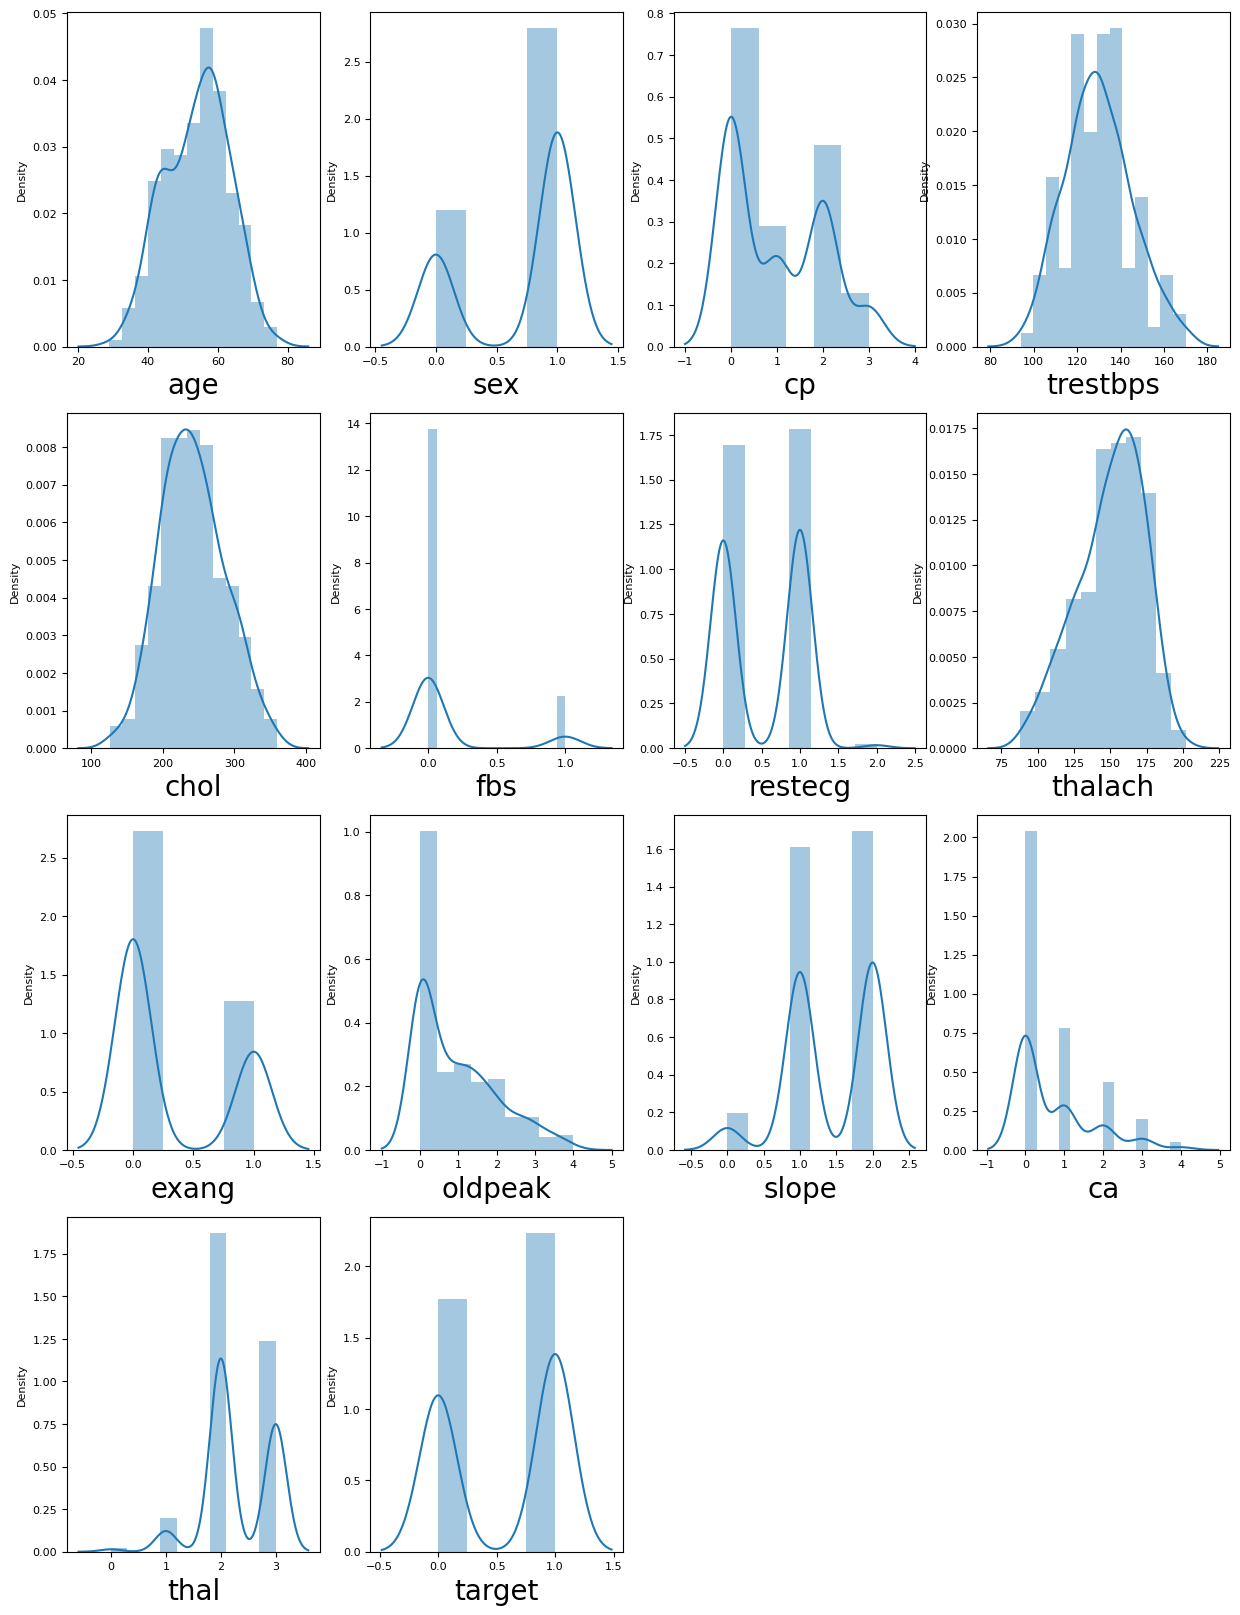

In [ ]:
# histogram cek disitribusi data
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<15 :
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
df.skew()

age        -0.144382
sex        -0.875685
cp          0.458141
trestbps    0.259175
chol        0.203702
fbs         2.070019
restecg     0.065127
thalach    -0.483509
exang       0.785686
oldpeak     0.924272
slope      -0.514674
ca          1.356873
thal       -0.454759
target     -0.236071
dtype: float64

Didapatkan skewed positif untuk kolom cp, trestbps, chol, fbs, restecg, exang, oldpeak, ca, dan skewed negatif untuk kolom age, sex, thalach, slope, thal, dan target.


* Skewed Positif: Grafik distribusi data yang cenderung skew positif memiliki ekor panjang di sebelah kanan dan pusat distribusi yang condong ke kiri. Ini berarti bahwa nilai-nilai data cenderung berkumpul di bagian kiri grafik dan terdapat beberapa nilai ekstrem di sebelah kanan.

*  Skewed Negatif: Grafik distribusi data yang cenderung skew negatif memiliki ekor panjang di sebelah kiri dan pusat distribusi yang condong ke kanan. Ini berarti bahwa nilai-nilai data cenderung berkumpul di bagian kanan grafik dan terdapat beberapa nilai ekstrem di sebelah kiri.

In [ ]:
# Cek distribusi data numerik
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].skew()

age        -0.144382
trestbps    0.259175
chol        0.203702
thalach    -0.483509
oldpeak     0.924272
dtype: float64

 Pada kolom data numerik dapat dikategorikan menjadi right skewed dan left skewed.


*  Right Skewed : mean > median, pada histogram yang memiliki distribusi right
skewed yaitu trestbps, chol, dan oldpeak.
*  Left Skewed : mean < median, pada histogram yang memiliki distribusi left skewed yaitu age dan thalach.


Pada kolom data nominal dan ordinal dapat ditentukan modus yaitu nilai yang sering muncul sebagai berikut:
*   sex memiliki nilai modus 1 yang berarti jenis kelamin pasien laki-laki memiliki dampak yang lebih rentana untuk terkena risiko heart disease dibandingkan perempuan.
*   cp memiliki nilai modus 0 yang berarati jenis nyeri dada yang dirasakan pasien paling banyak yaitu nyeri dada tipikal angina.
*   fbs memiliki nilai modus 0 yang berarti pasien paling banyak memiliki fasting blood sugar yang tidak melebihi 120 mg/dL.
*   restecg memiliki nilai modus 1 yang berarti resting electrocardiographic resultnya paling banyak terdapat kelainan gelombang S-T yang tidak normal.
*   exang memiliki nilai modus 0 yang berarti pasien paling banyak tidak mengalami angina yang diinduksi oleh latihan.
*   slope memiliki nilai modus 1 yang berarti pasien paling banyak memiliki kemiringan segmen ST naik secara perlahan pada saat latihan puncak.
*   ca memiliki nilai modus 0 yang berarti pasien memiliki kemungkinan yang kecil untuk terjadi penyempitan atau kerusakan pada pembuluh darah utama.
*   thal memiliki nilai modus 2 yang berarti pasien paling banyak memiliki hasil tes thallium scan cacat yang dapat dibalik.
*   target memiliki nilai modus 1 yang berarti pasien paling banyak memiliki riwayat risiko terkena penyakit jantung berdasarkan feature-feature di atas.



Sehigga median dan mean digunakan untuk melihat distribusi data numerik sedangkan modus digunakan untuk melihat distribusi data nominal dan ordinal.

1. Mean (rata-rata) adalah nilai tengah dari sekelompok data numerik dan sering digunakan untuk menggambarkan pusat distribusi data. Namun, mean sensitif terhadap nilai ekstrem (outliers) dan tidak selalu merepresentasikan distribusi data dengan baik jika terdapat outlier.

2. Median adalah nilai tengah dari sekelompok data ketika data diurutkan dari yang terkecil ke yang terbesar. Median kurang sensitif terhadap outlier daripada mean, sehingga lebih baik digunakan ketika distribusi data terpengaruh oleh outlier atau memiliki skewness yang signifikan.

3. Modus adalah nilai yang paling sering muncul dalam suatu dataset. Modus biasanya digunakan untuk data kategorikal atau ordinal, tetapi dapat juga digunakan untuk data numerik. Namun, dalam distribusi data numerik, modus tidak memberikan informasi yang sebanyak mean atau median.

## ***Feature Engineering***

---



### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler ke data dan transformasikan data
scaled_df = scaler.fit_transform(df)
# Hasil transformasi menjadi DataFrame
scaled_df_minmax = pd.DataFrame(scaled_df, columns=df.columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
scaled_df_minmax

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.407895,0.367521,0.0,0.5,0.701754,0.0,0.250,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.605263,0.329060,1.0,0.0,0.587719,1.0,0.775,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.671053,0.205128,0.0,0.5,0.324561,1.0,0.650,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.710526,0.329060,0.0,0.5,0.640351,0.0,0.000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.578947,0.717949,1.0,0.5,0.157895,0.0,0.475,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.812500,0.0,0.666667,0.342105,0.363248,0.0,0.0,0.236842,0.0,0.375,0.5,0.00,0.666667,1.0
279,0.312500,0.0,0.666667,0.184211,0.064103,0.0,0.5,0.763158,0.0,0.150,0.5,0.00,0.666667,1.0
280,0.479167,1.0,0.000000,0.447368,0.551282,0.0,0.5,0.640351,1.0,0.000,1.0,0.25,1.000000,0.0
281,0.625000,1.0,1.000000,0.868421,0.628205,0.0,0.0,0.324561,0.0,0.000,1.0,0.00,0.666667,0.0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,129.883392,242.314488,0.141343,0.522968,149.961131,0.318021,0.951943,1.427562,0.696113,2.296820,0.558304
std,9.128186,0.459224,1.031324,15.387795,44.654188,0.348992,0.514336,22.691625,0.466533,1.026400,0.599246,0.985472,0.610392,0.497469
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
scaled_df_minmax.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.521864,0.699647,0.328622,0.472150,0.497070,0.141343,0.261484,0.543519,0.318021,0.237986,0.713781,0.174028,0.765607,0.558304
std,0.190171,0.459224,0.343775,0.202471,0.190830,0.348992,0.257168,0.199049,0.466533,0.256600,0.299623,0.246368,0.203464,0.497469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.342105,0.361111,0.000000,0.000000,0.399123,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.473684,0.482906,0.000000,0.500000,0.570175,0.000000,0.150000,0.500000,0.000000,0.666667,1.000000
75%,0.645833,1.000000,0.666667,0.605263,0.617521,0.000000,0.500000,0.701754,1.000000,0.400000,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi Standard Scaler
scaler = StandardScaler()
# Fit scaler ke data dan transformasikan data
scaled_df = scaler.fit_transform(df)
# Hasil transformasi menjadi DataFrame
scaled_df_standard = pd.DataFrame(scaled_df, columns=df.columns)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,129.883392,242.314488,0.141343,0.522968,149.961131,0.318021,0.951943,1.427562,0.696113,2.296820,0.558304
std,9.128186,0.459224,1.031324,15.387795,44.654188,0.348992,0.514336,22.691625,0.466533,1.026400,0.599246,0.985472,0.610392,0.497469
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
scaled_df_standard.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02,2.830000e+02
mean,-3.452284e-17,8.159943e-17,3.138440e-17,5.335347e-16,-2.102755e-16,-6.276879e-18,-1.380913e-16,-3.044286e-16,-1.883064e-17,5.649191e-17,1.145530e-16,5.335347e-17,8.159943e-17,3.766128e-17
std,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00,1.001771e+00
min,-2.749050e+00,-1.526241e+00,-9.576158e-01,-2.336070e+00,-2.609398e+00,-4.057204e-01,-1.018584e+00,-2.735410e+00,-6.828772e-01,-9.291011e-01,-2.386483e+00,-7.076266e-01,-3.769526e+00,-1.124278e+00
25%,-7.736431e-01,-1.526241e+00,-9.576158e-01,-6.434256e-01,-7.137258e-01,-4.057204e-01,-1.018584e+00,-7.267127e-01,-6.828772e-01,-9.291011e-01,-7.147636e-01,-7.076266e-01,-4.871387e-01,-1.124278e+00
50%,1.043158e-01,6.552045e-01,1.372926e-02,7.591363e-03,-7.435717e-02,-4.057204e-01,9.291142e-01,1.341575e-01,-6.828772e-01,-3.434984e-01,-7.147636e-01,-7.076266e-01,-4.871387e-01,8.894601e-01
75%,6.530401e-01,6.552045e-01,9.850743e-01,6.586083e-01,6.323134e-01,-4.057204e-01,9.291142e-01,7.963654e-01,1.464392e+00,6.325061e-01,9.569562e-01,3.089131e-01,1.154055e+00,8.894601e-01
max,2.518703e+00,6.552045e-01,1.956419e+00,2.611659e+00,2.640155e+00,2.464752e+00,2.876813e+00,2.297370e+00,1.464392e+00,2.974917e+00,9.569562e-01,3.358532e+00,1.154055e+00,8.894601e-01


### Feature Selection

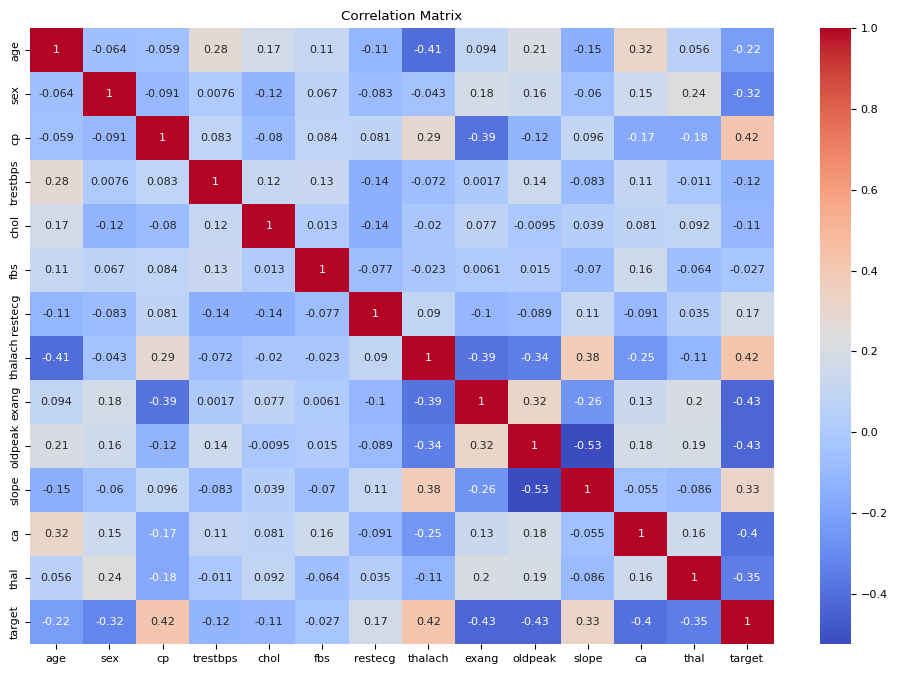

In [ ]:
# Korelasi antar fitur

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cor = df.corr()
cor_target = abs(cor['target'])

In [ ]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

age        0.222416
sex        0.318896
cp         0.416319
thalach    0.422559
exang      0.431599
oldpeak    0.434108
slope      0.326473
ca         0.397733
thal       0.349150
target     1.000000
Name: target, dtype: float64

In [ ]:
df_clean = pd.DataFrame(data=scaled_df_minmax, columns = ['age', 'sex', 'cp', 'thalach', 'exang','oldpeak','slope','ca','thal','target'])
df_clean

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.701754,0.0,0.250,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.587719,1.0,0.775,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.324561,1.0,0.650,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.640351,0.0,0.000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.157895,0.0,0.475,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...
278,0.812500,0.0,0.666667,0.236842,0.0,0.375,0.5,0.00,0.666667,1.0
279,0.312500,0.0,0.666667,0.763158,0.0,0.150,0.5,0.00,0.666667,1.0
280,0.479167,1.0,0.000000,0.640351,1.0,0.000,1.0,0.25,1.000000,0.0
281,0.625000,1.0,1.000000,0.324561,0.0,0.000,1.0,0.00,0.666667,0.0


In [ ]:
columns = ['age', 'sex', 'cp', 'thalach', 'exang','oldpeak','slope','ca','thal']

X = df_clean[columns]
y = df_clean['target']

In [ ]:
X.shape

(283, 9)

In [ ]:
y.shape

(283,)

### 1. Fitur ratio kolesterol terhadap tekanan darah

In [ ]:
df['chol_trestbps_ratio'] = df['chol'] / df['trestbps']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250


### 2. Fitur detak jantung maksimum terkoreksi

In [ ]:
# Mengkoreksi detak jantung maksimum berdasarkan usia
df['thalach_corrected'] = df['thalach'] - (220 - df['age'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,thalach_corrected
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,-12
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,-25
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,2
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,-37
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,-1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,-7
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,-36


### 3. Fitur skor risiko jantung

In [ ]:
# Menggunakan rumus Framingham Risk Score untuk menghitung skor risiko jantung
df['heart_disease_risk_score'] = (0.01 * df['age']) + (3.9 * df['sex']) + (1.8 * df['chol']) - (1.2 * df['thalach']) + (0.28 * df['oldpeak'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0,184.700
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,-12,184.698
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,-25,168.528
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,2,176.710
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,-52,403.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,-37,242.900
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,-1,44.408
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,-7,270.220
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,-36,345.890


### 4. Fitur rata-rata usia pasien berdasarkan jenis kelamin

In [ ]:
df['avg_age_by_sex'] = df.groupby('sex')['age'].transform('mean')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score,avg_age_by_sex
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0,184.700,53.666667
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,-12,184.698,53.666667
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,-25,168.528,53.666667
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,2,176.710,53.666667
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,-52,403.152,54.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,-37,242.900,54.941176
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,-1,44.408,54.941176
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,-7,270.220,53.666667
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,-36,345.890,53.666667


### 5. Fitur jumlah pasien dengan masing-masing jenis rasa sakit dada

In [ ]:
df['count_by_cp'] = df.groupby('cp')['cp'].transform('count')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score,avg_age_by_sex,count_by_cp
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0,184.700,53.666667,130
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,-12,184.698,53.666667,130
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,-25,168.528,53.666667,130
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,2,176.710,53.666667,130
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,-52,403.152,54.941176,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,-37,242.900,54.941176,82
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,-1,44.408,54.941176,82
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,-7,270.220,53.666667,130
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,-36,345.890,53.666667,22


### 6. Fitur jumlah pasien dengan hasil elektrokardiogram yang abnormal

In [ ]:
df['count_abnormal_ecg'] = df[df['restecg'] > 0]['restecg'].count()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score,avg_age_by_sex,count_by_cp,count_abnormal_ecg
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0,184.700,53.666667,130,146
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,-12,184.698,53.666667,130,146
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,-25,168.528,53.666667,130,146
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,2,176.710,53.666667,130,146
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,-52,403.152,54.941176,130,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,-37,242.900,54.941176,82,146
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,-1,44.408,54.941176,82,146
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,-7,270.220,53.666667,130,146
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,-36,345.890,53.666667,22,146


### 7. Fitur tekanan darah pasien berdasarkan kriteria medis

In [ ]:
bins = [0, 120, 140, 160, 180, np.inf]
labels = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
df['bps_category'] = pd.cut(df['trestbps'], bins=bins, labels=labels, right=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score,avg_age_by_sex,count_by_cp,count_abnormal_ecg,bps_category
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,1.696000,0,184.700,53.666667,130,146,Elevated
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,1.450000,-12,184.698,53.666667,130,146,Hypertension Stage 1
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,1.200000,-25,168.528,53.666667,130,146,Hypertension Stage 1
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,1.371622,2,176.710,53.666667,130,146,Hypertension Stage 1
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,0,2.130435,-52,403.152,54.941176,130,146,Elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,0,2,1,1.758333,-37,242.900,54.941176,82,146,Elevated
733,44,0,2,108,141,0,1,175,0,0.6,...,0,2,1,1.305556,-1,44.408,54.941176,82,146,Normal
739,52,1,0,128,255,0,1,161,1,0.0,...,1,3,0,1.992188,-7,270.220,53.666667,130,146,Elevated
843,59,1,3,160,273,0,0,125,0,0.0,...,0,2,0,1.706250,-36,345.890,53.666667,22,146,Hypertension Stage 2


### 8. Fitur kadar kolesterol total pasien berdasarkan kriteria medis

In [ ]:
bins = [0, 200, 240, np.inf]
labels = ['Desirable', 'Borderline High', 'High']
df['chol_category'] = pd.cut(df['chol'], bins=bins, labels=labels, right=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score,avg_age_by_sex,count_by_cp,count_abnormal_ecg,bps_category,chol_category
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,1.696000,0,184.700,53.666667,130,146,Elevated,Borderline High
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,1.450000,-12,184.698,53.666667,130,146,Hypertension Stage 1,Borderline High
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,1.200000,-25,168.528,53.666667,130,146,Hypertension Stage 1,Desirable
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,1.371622,2,176.710,53.666667,130,146,Hypertension Stage 1,Borderline High
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,2.130435,-52,403.152,54.941176,130,146,Elevated,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,2,1,1.758333,-37,242.900,54.941176,82,146,Elevated,Borderline High
733,44,0,2,108,141,0,1,175,0,0.6,...,2,1,1.305556,-1,44.408,54.941176,82,146,Normal,Desirable
739,52,1,0,128,255,0,1,161,1,0.0,...,3,0,1.992188,-7,270.220,53.666667,130,146,Elevated,High
843,59,1,3,160,273,0,0,125,0,0.0,...,2,0,1.706250,-36,345.890,53.666667,22,146,Hypertension Stage 2,High


### 9. Fitur detak jantung maksimum yang dicapai pasien berdasarkan kriteria medis

In [ ]:
bins = [0, 100, 150, 200, np.inf]
labels = ['Below Normal', 'Normal', 'Above Normal', 'High']
df['max_heart_rate_category'] = pd.cut(df['thalach'], bins=bins, labels=labels, right=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score,avg_age_by_sex,count_by_cp,count_abnormal_ecg,bps_category,chol_category,max_heart_rate_category
0,52,1,0,125,212,0,1,168,0,1.0,...,0,1.696000,0,184.700,53.666667,130,146,Elevated,Borderline High,Above Normal
1,53,1,0,140,203,1,0,155,1,3.1,...,0,1.450000,-12,184.698,53.666667,130,146,Hypertension Stage 1,Borderline High,Above Normal
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1.200000,-25,168.528,53.666667,130,146,Hypertension Stage 1,Desirable,Normal
3,61,1,0,148,203,0,1,161,0,0.0,...,0,1.371622,2,176.710,53.666667,130,146,Hypertension Stage 1,Borderline High,Above Normal
4,62,0,0,138,294,1,1,106,0,1.9,...,0,2.130435,-52,403.152,54.941176,130,146,Elevated,High,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,1,1.758333,-37,242.900,54.941176,82,146,Elevated,Borderline High,Normal
733,44,0,2,108,141,0,1,175,0,0.6,...,1,1.305556,-1,44.408,54.941176,82,146,Normal,Desirable,Above Normal
739,52,1,0,128,255,0,1,161,1,0.0,...,0,1.992188,-7,270.220,53.666667,130,146,Elevated,High,Above Normal
843,59,1,3,160,273,0,0,125,0,0.0,...,0,1.706250,-36,345.890,53.666667,22,146,Hypertension Stage 2,High,Normal


### 10. Fitur depresi ST yang disebabkan oleh latihan berdasarkan kriteria medis

In [ ]:
bins = [-np.inf, 1, 2, np.inf]
labels = ['Low', 'Moderate', 'High']
df['oldpeak_category'] = pd.cut(df['oldpeak'], bins=bins, labels=labels, right=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,thalach_corrected,heart_disease_risk_score,avg_age_by_sex,count_by_cp,count_abnormal_ecg,bps_category,chol_category,max_heart_rate_category,oldpeak_category
0,52,1,0,125,212,0,1,168,0,1.0,...,1.696000,0,184.700,53.666667,130,146,Elevated,Borderline High,Above Normal,Moderate
1,53,1,0,140,203,1,0,155,1,3.1,...,1.450000,-12,184.698,53.666667,130,146,Hypertension Stage 1,Borderline High,Above Normal,High
2,70,1,0,145,174,0,1,125,1,2.6,...,1.200000,-25,168.528,53.666667,130,146,Hypertension Stage 1,Desirable,Normal,High
3,61,1,0,148,203,0,1,161,0,0.0,...,1.371622,2,176.710,53.666667,130,146,Hypertension Stage 1,Borderline High,Above Normal,Low
4,62,0,0,138,294,1,1,106,0,1.9,...,2.130435,-52,403.152,54.941176,130,146,Elevated,High,Normal,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,1.758333,-37,242.900,54.941176,82,146,Elevated,Borderline High,Normal,Moderate
733,44,0,2,108,141,0,1,175,0,0.6,...,1.305556,-1,44.408,54.941176,82,146,Normal,Desirable,Above Normal,Low
739,52,1,0,128,255,0,1,161,1,0.0,...,1.992188,-7,270.220,53.666667,130,146,Elevated,High,Above Normal,Low
843,59,1,3,160,273,0,0,125,0,0.0,...,1.706250,-36,345.890,53.666667,22,146,Hypertension Stage 2,High,Normal,Low


### 11. Fitur rentang usia

In [ ]:
bins = [0, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thalach_corrected,heart_disease_risk_score,avg_age_by_sex,count_by_cp,count_abnormal_ecg,bps_category,chol_category,max_heart_rate_category,oldpeak_category,age_group
0,52,1,0,125,212,0,1,168,0,1.0,...,0,184.700,53.666667,130,146,Elevated,Borderline High,Above Normal,Moderate,51-60
1,53,1,0,140,203,1,0,155,1,3.1,...,-12,184.698,53.666667,130,146,Hypertension Stage 1,Borderline High,Above Normal,High,51-60
2,70,1,0,145,174,0,1,125,1,2.6,...,-25,168.528,53.666667,130,146,Hypertension Stage 1,Desirable,Normal,High,71-80
3,61,1,0,148,203,0,1,161,0,0.0,...,2,176.710,53.666667,130,146,Hypertension Stage 1,Borderline High,Above Normal,Low,61-70
4,62,0,0,138,294,1,1,106,0,1.9,...,-52,403.152,54.941176,130,146,Elevated,High,Normal,Moderate,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,-37,242.900,54.941176,82,146,Elevated,Borderline High,Normal,Moderate,61-70
733,44,0,2,108,141,0,1,175,0,0.6,...,-1,44.408,54.941176,82,146,Normal,Desirable,Above Normal,Low,41-50
739,52,1,0,128,255,0,1,161,1,0.0,...,-7,270.220,53.666667,130,146,Elevated,High,Above Normal,Low,51-60
843,59,1,3,160,273,0,0,125,0,0.0,...,-36,345.890,53.666667,22,146,Hypertension Stage 2,High,Normal,Low,51-60
